<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/YouTubeObjectDetectionVideoYolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DETECCIÓN DE OBJETOS - MODELO YOLOv3 (Videos)
Créditos: https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv 

In [41]:
!pip uninstall -f opencv-python
!pip install opencv-python==4.1.2.30
!pip install pafy
!pip install youtube_dl
#import pkg_resources
#pkg_resources.require("opencv-python==4.1.2.30")



Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -f


In [43]:
#import pkg_resources
#pkg_resources.require("opencv-python==4.1.2.30")
import cv2

print(cv2.__version__)

4.1.2


In [44]:
mkdir output

mkdir: cannot create directory ‘output’: File exists


In [0]:
# import the necessary packages
import numpy as np
import imutils
import time
import cv2
import pafy


path_project = "/content/"

CONFIDENCE = 0.5
THREASHOLD = 0.3

**Cargando el modelo YOLO**

In [47]:
# Cargando las classes (categorias) del modelo pre-entrenado (COCO dataset)
labelsModelo = "".join([path_project,"/model","/coco","/model.names_es.txt"])
LABELS = open(labelsModelo).read().strip().split("\n")

# Inicializar un color aleatorio para ser usado en identificar cada clase (rectángulo que identifica la clase)
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),	dtype="uint8")

# Cargando los pesos y configuración del modelo pre-entrenado (COCO dataset)
configModelo = "".join([path_project,"/model","/coco","/model.cfg"])
pesosModelo = "".join([path_project,"/model","/coco","/model.weights"])

# Cargar el modelo detector de objetos YOLO (COCO dataset con 80 classes)
print("[INFO] Modelo YOLO cargado desde el disco ...")
net = cv2.dnn.readNetFromDarknet(configModelo, pesosModelo)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

[INFO] Modelo YOLO cargado desde el disco ...


**Cargando video a analizar en modo streaming**

In [48]:
# Video frame dimensions
# video_name = "".join([path_project,"/input","/videos","/lima-city3.mp4"])
# video_name = "".join([path_project,"/input","/videos","/gaston-acurio.mp4"])

url = 'https://www.youtube.com/watch?v=qpYABrF888o'
vPafy = pafy.new(url)
play = vPafy.getbest(preftype="webm")

vs = cv2.VideoCapture(play.url)
writer = None
(W, H) = (None, None)


# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] 112048 total frames in video


**Iterando sobre los frames del video**

/content//output/video_output.avi
[INFO] Un frame toma 2.2243 segundos
[INFO] Tiempo total estimado para completar: 249224.5626


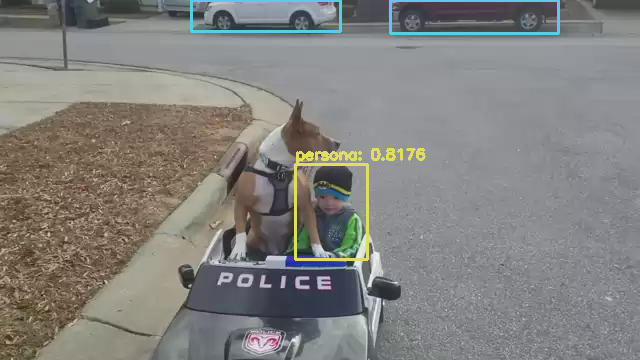

+

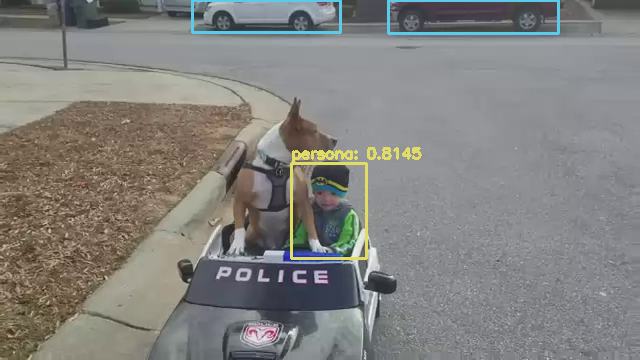

+

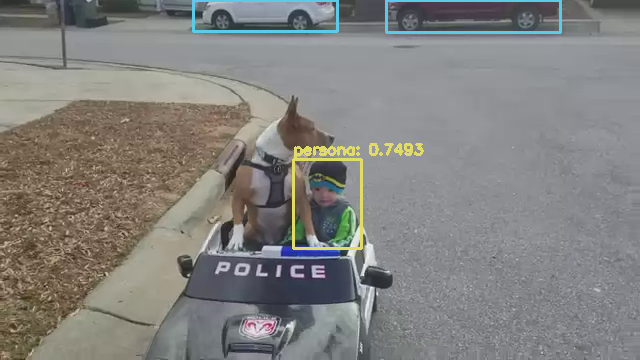

+

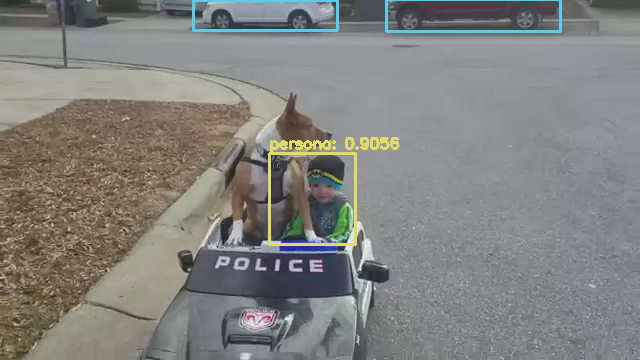

+

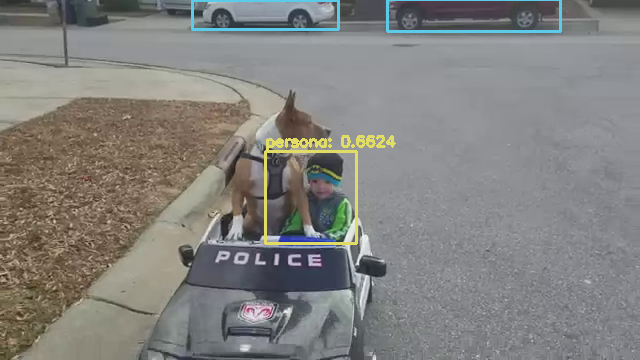

+

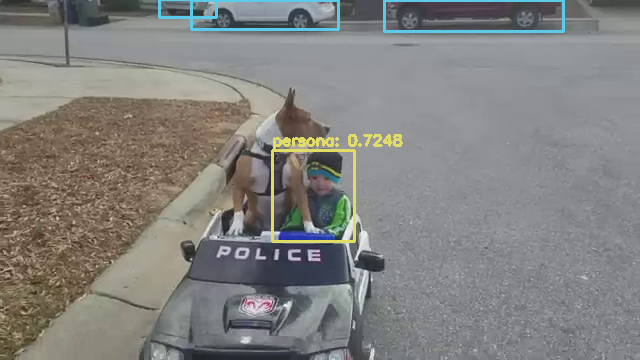

+

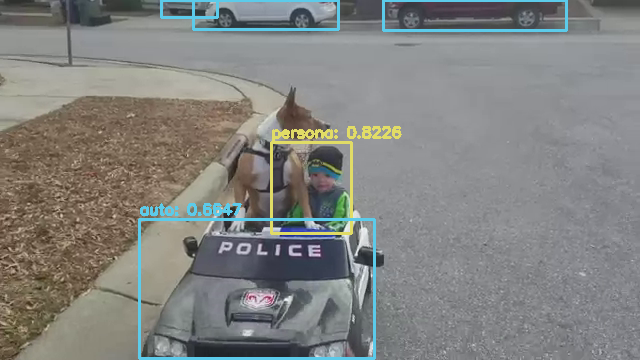

+

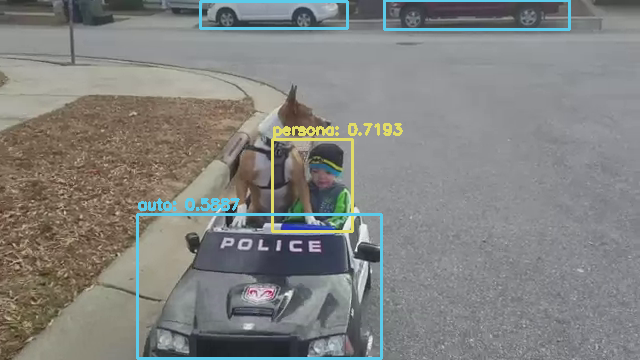

+

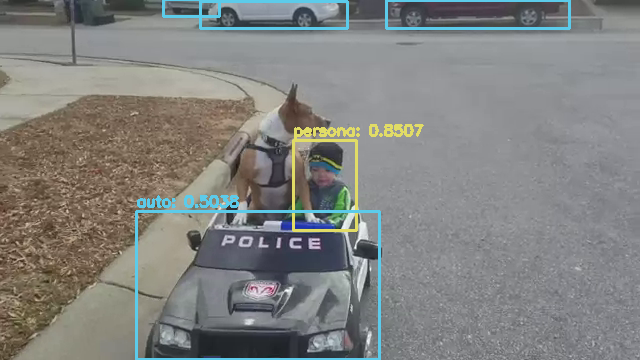

+

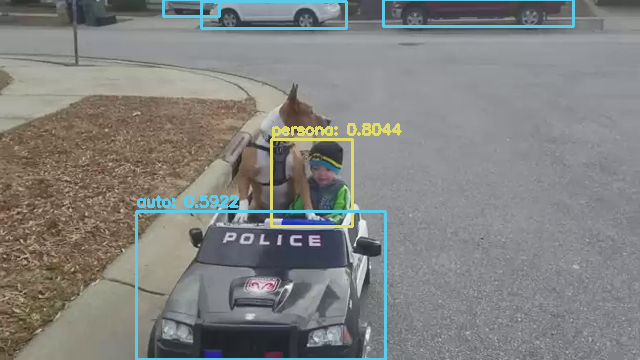

+

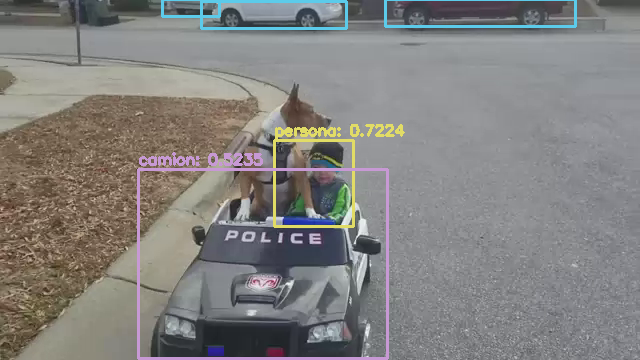

+

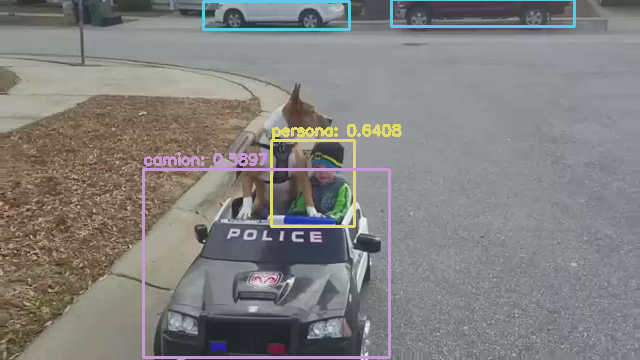

+

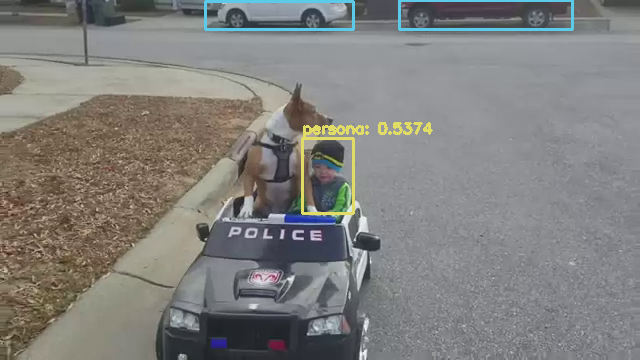

+

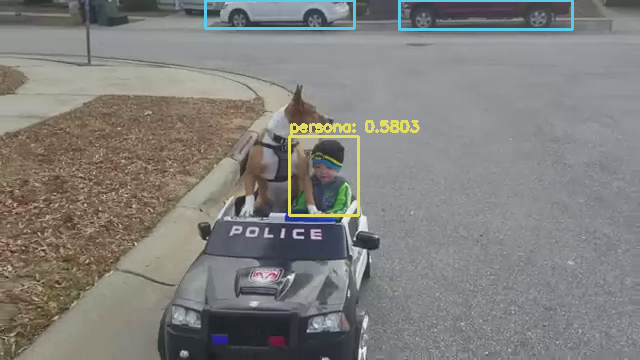

+

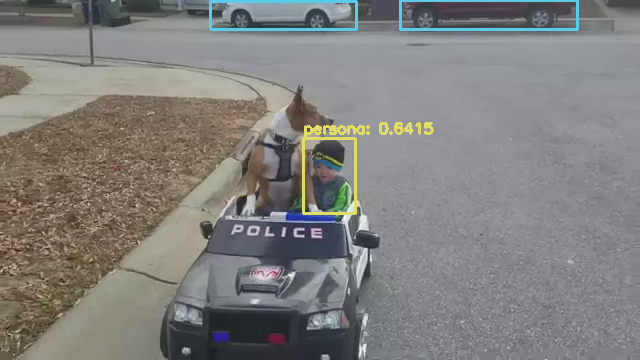

+

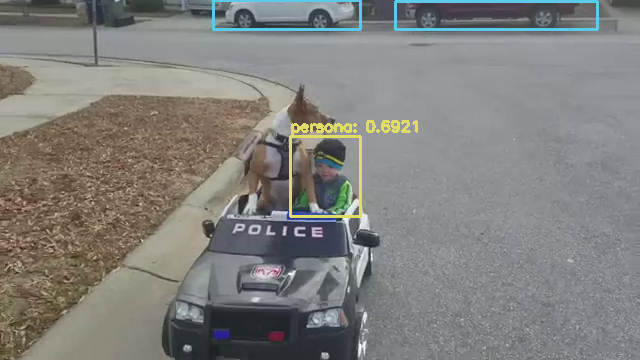

+

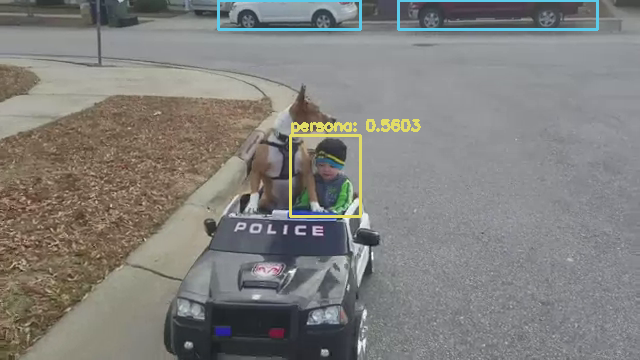

+

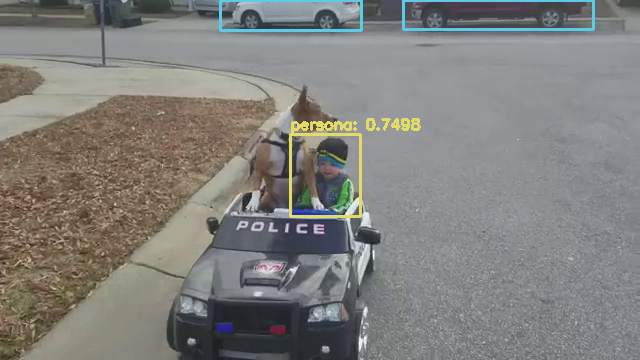

+

KeyboardInterrupt: ignored

In [49]:
cnt = 0
# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()

	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]

	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
	net.setInput(blob)
	start = time.time()
	layerOutputs = net.forward(ln)
	end = time.time()

	# initialize our lists of detected bounding boxes, confidences,
	# and class IDs, respectively
	boxes = []
	confidences = []
	classIDs = []

	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]

			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > CONFIDENCE:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")

				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))

				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)

	# apply non-maxima suppression to suppress weak, overlapping
	# bounding boxes
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THREASHOLD)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])

			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[classIDs[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
			cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

	# check if the video writer is None
	if writer is None:
			# initialize our video writer
			fourcc = cv2.VideoWriter_fourcc(*"MJPG")
			video_output = "".join([path_project,"/output","/video_output.avi"])
			print(video_output)
			writer = cv2.VideoWriter(video_output, fourcc, 30,	(frame.shape[1], frame.shape[0]), True)
			# some information on processing single frame
			if total > 0:
				elap = (end - start)
				print("[INFO] Un frame toma {:.4f} segundos".format(elap))
				print("[INFO] Tiempo total estimado para completar: {:.4f}".format(elap * total))

	if cnt % 24 == 0:
		cv2_imshow(frame)	

	print("+", end = '')
	# write the output frame to disk
	writer.write(frame)

# release the file pointers
print("\n[INFO] Finalizando ...")
writer.release()
vs.release()